# OCR - Deskew

Auxiliar para probar el algoritmo de deskew.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import cv2
from deskew import determine_skew
from paddleocr import PaddleOCR
from skimage.color import rgb2gray
from skimage.io import imshow, show
from skimage.transform import rotate

from lib.util import display_image

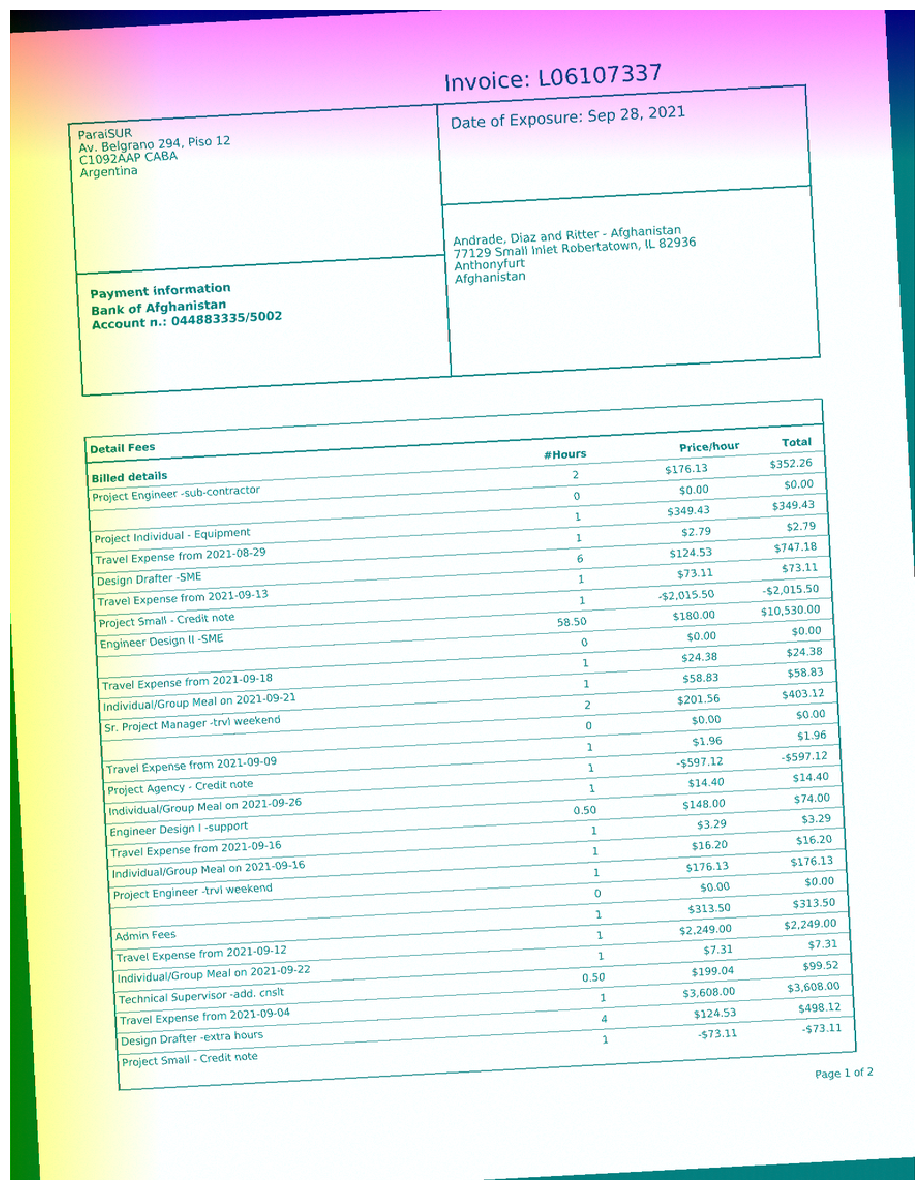

In [4]:
image_path = "../data-extracted/Invoice (4990).pdf/0.png"
image = cv2.imread(image_path)

display_image(image)

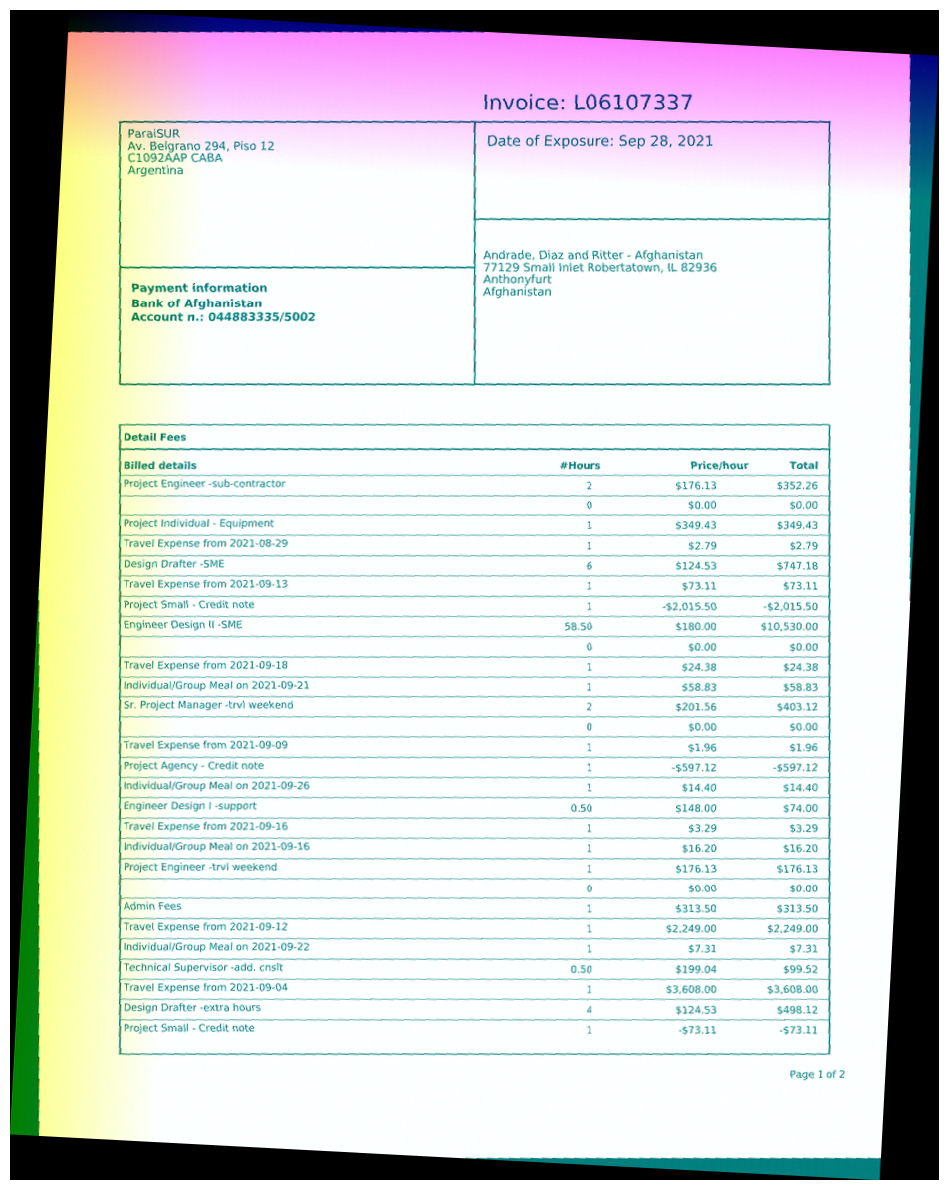

In [5]:
angle = determine_skew(image)

image_deskew = rotate(image, angle, resize=True)
image_deskew = (image_deskew * 255).astype("uint8") # volver a 0-255

display_image(image_deskew)

Initializing PaddleOCR instance...


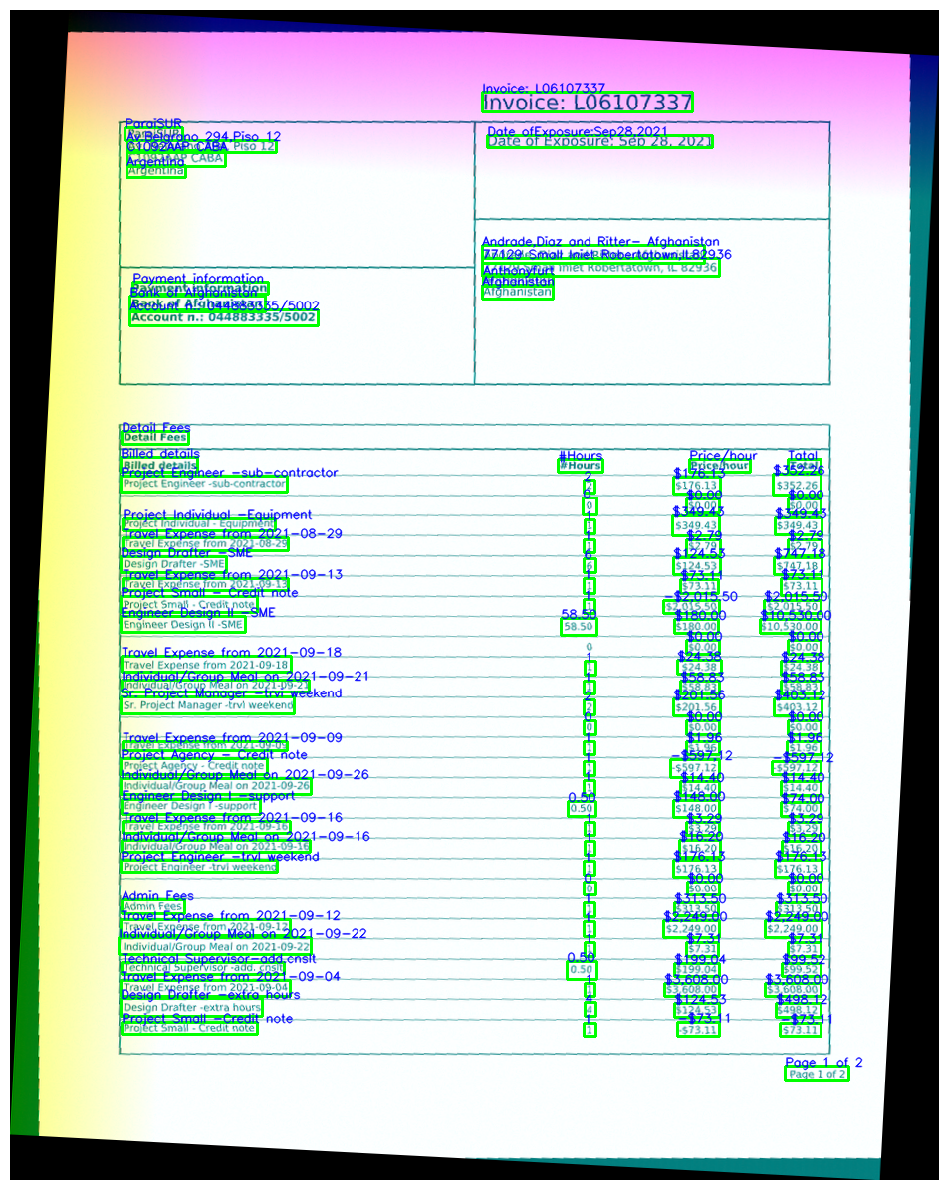

In [6]:
from lib.ocr import OCRParams, run_ocr_image

ocr = run_ocr_image(image_path, OCRParams(engine="paddleocr", deskew=True))["boxes"]

for item in ocr:
    box = item["bounds"]
    cv2.rectangle(image_deskew, box[0], box[2], (0, 255, 0), 2)
    cv2.putText(
        image_deskew,
        item["text"],
        box[0],
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4,
        (0, 0, 255),
        1,
        cv2.LINE_AA,
    )

display_image(image_deskew)